# Running EM on the birdsong corpus

## Getting set up

In [24]:
import markhov
import em
import numpy as np
import pandas as pd
%pylab inline
import seaborn as sns
from florisplotlib import *
import random

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Read in the birdsong corpus

In [2]:
f=open('../corpus/cath8.txt','r')
corpus = f.readlines()
f.close()
corpus = [line.rstrip('\n') for line in corpus]


Create a transition grammar for the corpus

In [3]:
trans = {'[':[]}
for s in corpus:
    s=['[']+s.split(' ')
    for i in range(1,len(s)):
        trans[s[i-1]]=trans.get(s[i-1],[])
        if s[i] not in trans[s[i-1]]:
            trans[s[i-1]].append(s[i])


Operations FSA

In [4]:
ops = {'S':[('S','mg'),('F','end')], # from start we have to merge
       'F':[] #final state
   }


## Expectation Maximisation time!

In [5]:
n = 10 # number of EM iterations to do

In [6]:
history=em.em(corpus,trans,ops,n) # run EM

### Display the results

Make the rules into a simpler list

In [7]:
rules=[]
for lhs in ops:
    for (rhs,e) in ops[lhs]:
        rules.append(('%s->%s %s'%(lhs,e,rhs),(lhs,rhs,e)))

Put them and their updating probabilities into a table

In [8]:
tab=[]
for (rule,(lhs,rhs,e)) in rules:
    thisrule={' rule':rule}
    for i in range(n):
        p=history[i]['fsa'][lhs][(rhs,e)]
        thisrule["p.iteration%03d"%i]=p
    tab.append(thisrule)

Use pandas to make the table into a datafram

In [9]:
df = pd.DataFrame(tab)

In [10]:
df

,rule,p.iteration000,p.iteration001,p.iteration002,p.iteration003,p.iteration004,p.iteration005,p.iteration006,p.iteration007,p.iteration008,p.iteration009
0,S->mg S,-0.585806,-0.131859,-0.131859,-0.131859,-0.131859,-0.131859,-0.131859,-0.131859,-0.131859,-0.131859
1,S->end F,-0.813412,-2.091228,-2.091228,-2.091228,-2.091228,-2.091228,-2.091228,-2.091228,-2.091228,-2.091228


In [11]:
df.to_csv('ops_%s.csv'%('oct_23_2016_cath8')) # print to file

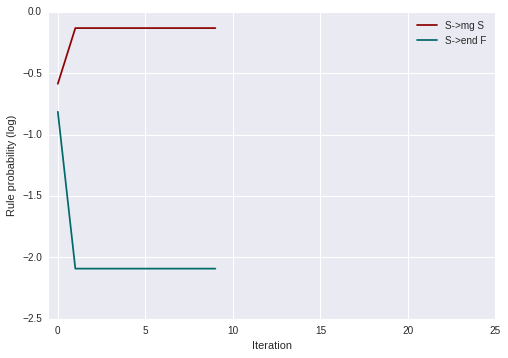

In [12]:
ncol,_ = df.shape
colors = get_colors(ncol)
for i,row in df.iterrows():
    col = colors[i]
    plot(range(n),[ row["p.iteration%03d"%i] for i in range(n) ],'-',color=col,label=row[" rule"])
legend()
xlim(-.5,n+15)
xlabel("Iteration")
ylabel("Rule probability (log)")

Same for the transitions

In [13]:
bigrams=[]
for lhs in trans:
    for rhs in trans[lhs]:
        bigrams.append(('%s,%s'%(lhs,rhs),(lhs,rhs)))

In [14]:
tab=[]
for (bi,(lhs,rhs)) in bigrams:
    thisrule={' bigram':bi}
    for i in range(n):
        p=history[i]['trans_probs'][lhs][rhs]
        thisrule["p.iteration%03d"%i]=p
    tab.append(thisrule)

In [15]:
df_bis = pd.DataFrame(tab)

In [16]:
df_bis

,bigram,p.iteration000,p.iteration001,p.iteration002,p.iteration003,p.iteration004,p.iteration005,p.iteration006,p.iteration007,p.iteration008,p.iteration009
0,"aua,aiz",-3.030521,-3.028522,-3.028522,-3.028522,-3.028522,-3.028522,-3.028522,-3.028522,-3.028522,-3.028522
1,"aua,ats",-2.369932,-0.949081,-0.949081,-0.949081,-0.949081,-0.949081,-0.949081,-0.949081,-0.949081,-0.949081
2,"aua,aua",-4.939390,-0.908259,-0.908259,-0.908259,-0.908259,-0.908259,-0.908259,-0.908259,-0.908259,-0.908259
3,"aua,amb",-1.903236,-3.433987,-3.433987,-3.433987,-3.433987,-3.433987,-3.433987,-3.433987,-3.433987,-3.433987
4,"aua,aje",-1.806370,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134
5,"aua,aiy",-2.600775,-3.433987,-3.433987,-3.433987,-3.433987,-3.433987,-3.433987,-3.433987,-3.433987,-3.433987
6,"aua,aib",-2.006093,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134
7,"aua,ban",-1.836537,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134
8,"aua,awi",-2.316798,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134
9,"aua,abu",-2.850566,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134,-4.127134


In [17]:
df_bis.to_csv('trans_%s.csv'%('oct_23_2016_cath8'))

### Calculate the log likelihood of the corpus given the trained grammar

This is the ll of the corpus at the end of training:

In [18]:
# parse the corpus
parsed_corpus=em.parse_corpus(corpus,trans,ops)

In [19]:
em.ll_corpus(parsed_corpus,history[-1]['trans_probs'],history[-1]['fsa'])

-4732.257781637416

Make a dataframe of the LL of the corpus throughout training:

In [20]:
tab=[]
for i in range(n):
    this_iter={'iteration':i,
               'likelihood':em.ll_corpus(parsed_corpus,history[i]['trans_probs'],history[i]['fsa'])}
    tab.append(this_iter)

In [21]:
df_lls=pd.DataFrame(tab)

In [22]:
df_lls

,iteration,likelihood
0,0,-7853.044710
1,1,-4732.257782
2,2,-4732.257782
3,3,-4732.257782
4,4,-4732.257782
5,5,-4732.257782
6,6,-4732.257782
7,7,-4732.257782
8,8,-4732.257782
9,9,-4732.257782


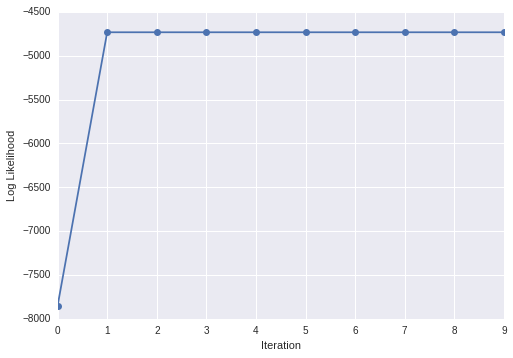

In [23]:
plot(df_lls["iteration"],df_lls["likelihood"],'o-')
xlabel("Iteration")
ylabel("Log Likelihood")